<div align="center">

### Proactive Customer Retention 
### **A Data-Driven Approach to Predicting Churn in the Telecom Industry**

### *Leveraging Machine Learning to predict Churn*

#### **TEAM MEMBERS:** AMMAR | BADRI | KAPIL  
#### **Date:** October 2, 2025

</div>

### **The Business Problem**

---

#### Problem Statement
- Develop a machine learning model to predict **telecom customer churn**, i.e., which customers are most likely to discontinue their service.  

#### The Core Challenge

Customer churn directly erodes revenue and drives up costs. In general, it is much easier and cheaper to retain an existing customer than to acquire a new one. Identifying customers that are at risk of churning in advance allows for companies to implement targeted interventions that can prevent the customers from churning, thereby significantly improving profitability.

#### Our Dataset

The training dataset contains **2.1 million anonymized customer records**. It includes a mix of **numerical and categorical features** that capture:  

- **Customer demographics and profile information** (e.g., location, tenure with the network).  
- **Financial behavior** such as recharge amounts and monthly revenue.  
- **Usage patterns** covering data, calls, and activity levels.  
- **Service preferences** like package subscriptions and frequency of activations.  

The target variable is **CHURN**, indicating whether a customer remained active or discontinued their service.

#### Financial Impact of Churn
- **Revenue erosion**: Each churned customer represents lost recurring revenue streams.  
- **Increased acquisition costs**: Replacing churned customers requires substantial marketing and sales spend.  

#### How a Churn Prediction Model Helps

A churn prediction model can identify at-risk customers before they leave. This enables telecom companies to create tailored retention strategies, proactive outreach and provide service improvements. The company will know where targeted interventions need to be focused on so that they have the highest probability of success. This will also improve overall satisfaction and trust of the users. 

#### Potential Impact
- **Reduced churn** rates, preserving steady recurring revenues.  
- **Significant cost savings** by reducing reliance on expensive customer acquisition.  
- **Increased ROI** from smarter allocation of retention budgets.  
- **Material financial upside** — even small improvements in churn reduction can translate into **millions of dollars in annual savings**.  


### Import Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

### Set Random Seed

In [2]:
#Set Random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
DATA_PATH = "../data/Train.csv" 

### Load Data 

In [3]:

DATA_PATH = "../data/Train.csv"
df = pd.read_csv(DATA_PATH)

print("\nDataset Summary")
print("-" * 60)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")

print("\nColumns:")
print(", ".join(df.columns))

print("\nPreview:")
print(df.head().to_markdown(index=False))



Dataset Summary
------------------------------------------------------------
Shape: 2,154,048 rows × 19 columns

Columns:
user_id, REGION, TENURE, MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, FREQUENCE, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, MRG, REGULARITY, TOP_PACK, FREQ_TOP_PACK, CHURN

Preview:
| user_id                                  | REGION   | TENURE        |   MONTANT |   FREQUENCE_RECH |   REVENUE |   ARPU_SEGMENT |   FREQUENCE |   DATA_VOLUME |   ON_NET |   ORANGE |   TIGO |   ZONE1 |   ZONE2 | MRG   |   REGULARITY | TOP_PACK                       |   FREQ_TOP_PACK |   CHURN |
|:-----------------------------------------|:---------|:--------------|----------:|-----------------:|----------:|---------------:|------------:|--------------:|---------:|---------:|-------:|--------:|--------:|:------|-------------:|:-------------------------------|----------------:|--------:|
| 00000bfd7d50f01092811bc0c8d7b0d6fe7c3596 | FATICK   | K > 24 month  |      4250 |         

### Data Column Description

| Column         | Type        | Description                                   |
|----------------|-------------|-----------------------------------------------|
| user_id        | Categorical | Unique identifier for each customer           |
| REGION         | Categorical | Geographic location of the customer           |
| TENURE         | Ordinal     | Duration in the network                       |
| MONTANT        | Numerical   | Recharge/top-up amount                        |
| FREQUENCE_RECH | Numerical   | Number of recharges                           |
| REVENUE        | Numerical   | Monthly revenue of the customer               |
| ARPU_SEGMENT   | Numerical   | Average revenue over 90 days / 3              |
| FREQUENCE      | Numerical   | Number of times customer generated revenue    |
| DATA_VOLUME    | Numerical   | Data usage volume (connections)               |
| ON_NET         | Numerical   | Calls within same network (Expresso)          |
| ORANGE         | Numerical   | Calls made to Orange network                  |
| TIGO           | Numerical   | Calls made to Tigo network                    |
| ZONE1          | Numerical   | Calls made to Zone 1 (external region)        |
| ZONE2          | Numerical   | Calls made to Zone 2 (external region)        |
| MRG            | Categorical | Customer group/marketing segment              |
| REGULARITY     | Numerical   | Number of active days within 90 days          |
| TOP_PACK       | Categorical | Most frequently activated package             |
| FREQ_TOP_PACK  | Numerical   | Frequency of activating top package           |
| CHURN          | Binary      | Target variable (0 = Active, 1 = Churned)     |

### Exploratory Data Analysis

#### Target Variable Distribution

In [4]:
print("\nTarget Distribution (CHURN):")
print(df['CHURN'].value_counts().to_string())

churn_rate = df['CHURN'].mean() * 100
print(f"\nChurn rate: {churn_rate:.2f}%")
print(f"Non-churn rate: {100 - churn_rate:.2f}%")


Target Distribution (CHURN):
CHURN
0    1750062
1     403986

Churn rate: 18.75%
Non-churn rate: 81.25%


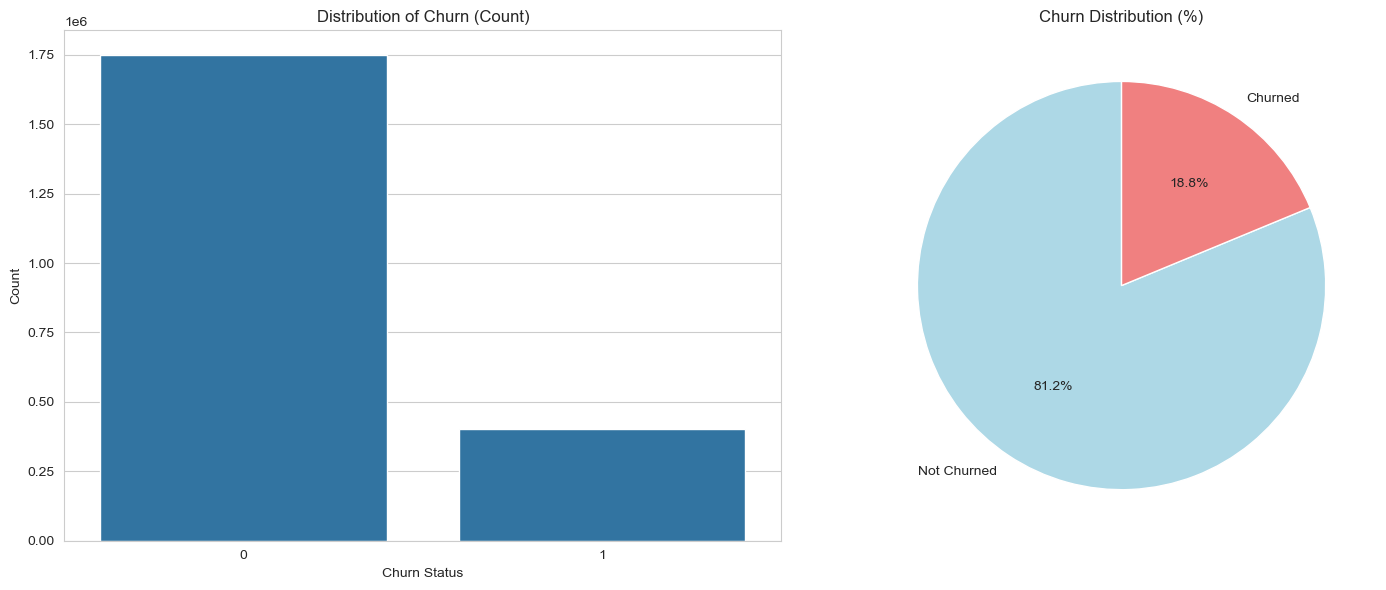

In [5]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='CHURN', ax=axes[0])
axes[0].set_title('Distribution of Churn (Count)')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Count')

# Pie chart
churn_counts = df['CHURN'].value_counts()
axes[1].pie(churn_counts.values, labels=['Not Churned', 'Churned'], 
           autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[1].set_title('Churn Distribution (%)')

plt.tight_layout()
plt.show()

| Class       | Share  |
|-------------|--------|
| Not Churned | 81.25% |
| Churned     | 18.75% |


##### Implications for Modeling

* The dataset is **imbalanced**, with the majority of customers in the *Not Churned* class.  
* If we rely only on **accuracy**, a naive model that predicts "Not Churned" for every case would still achieve ~81% accuracy, but provide no real predictive power.  
* To properly evaluate models, we will focus on metrics that are more sensitive to class imbalance:  
  - **ROC-AUC**: Measures overall ability to distinguish between churned and not churned customers (contest benchmark).  
  - **F1-Score**: Harmonic mean of precision and recall, useful for balancing false positives and false negatives.  
* For cross-validation:  
  - Standard **K-Fold CV** may produce folds with very few churned samples, worsening the imbalance.  
  - **Stratified K-Fold CV** will be used instead, ensuring that each fold maintains a churn/not-churn ratio close to the original dataset. This helps produce more reliable and consistent validation results.  


#### Data Types, missing values summary

In [6]:
print("=== Data Types Summary ===")
print(df.dtypes.value_counts())

print("\n=== Missing Values Summary ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = (
    pd.DataFrame({
        "Missing_Count": missing_data,
        "Missing_Percent": missing_percent.round(2)
    })
    .query("Missing_Count > 0")
    .sort_values("Missing_Count", ascending=False)
)
print(missing_summary)

=== Data Types Summary ===
float64    12
object      5
int64       2
Name: count, dtype: int64

=== Missing Values Summary ===
                Missing_Count  Missing_Percent
ZONE2                 2017224            93.65
ZONE1                 1984327            92.12
TIGO                  1290016            59.89
DATA_VOLUME           1060433            49.23
FREQ_TOP_PACK          902594            41.90
TOP_PACK               902594            41.90
ORANGE                 895248            41.56
REGION                 849299            39.43
ON_NET                 786675            36.52
MONTANT                756739            35.13
FREQUENCE_RECH         756739            35.13
FREQUENCE              726048            33.71
REVENUE                726048            33.71
ARPU_SEGMENT           726048            33.71


In [42]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('CHURN')  # Exclude target variable
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

#### Key Numerical Features Distribution

In [43]:
numerical_features

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK']

NOTE - Please be careful while running the numerical feature plotting code - it took ~8 minutes for me to run :|

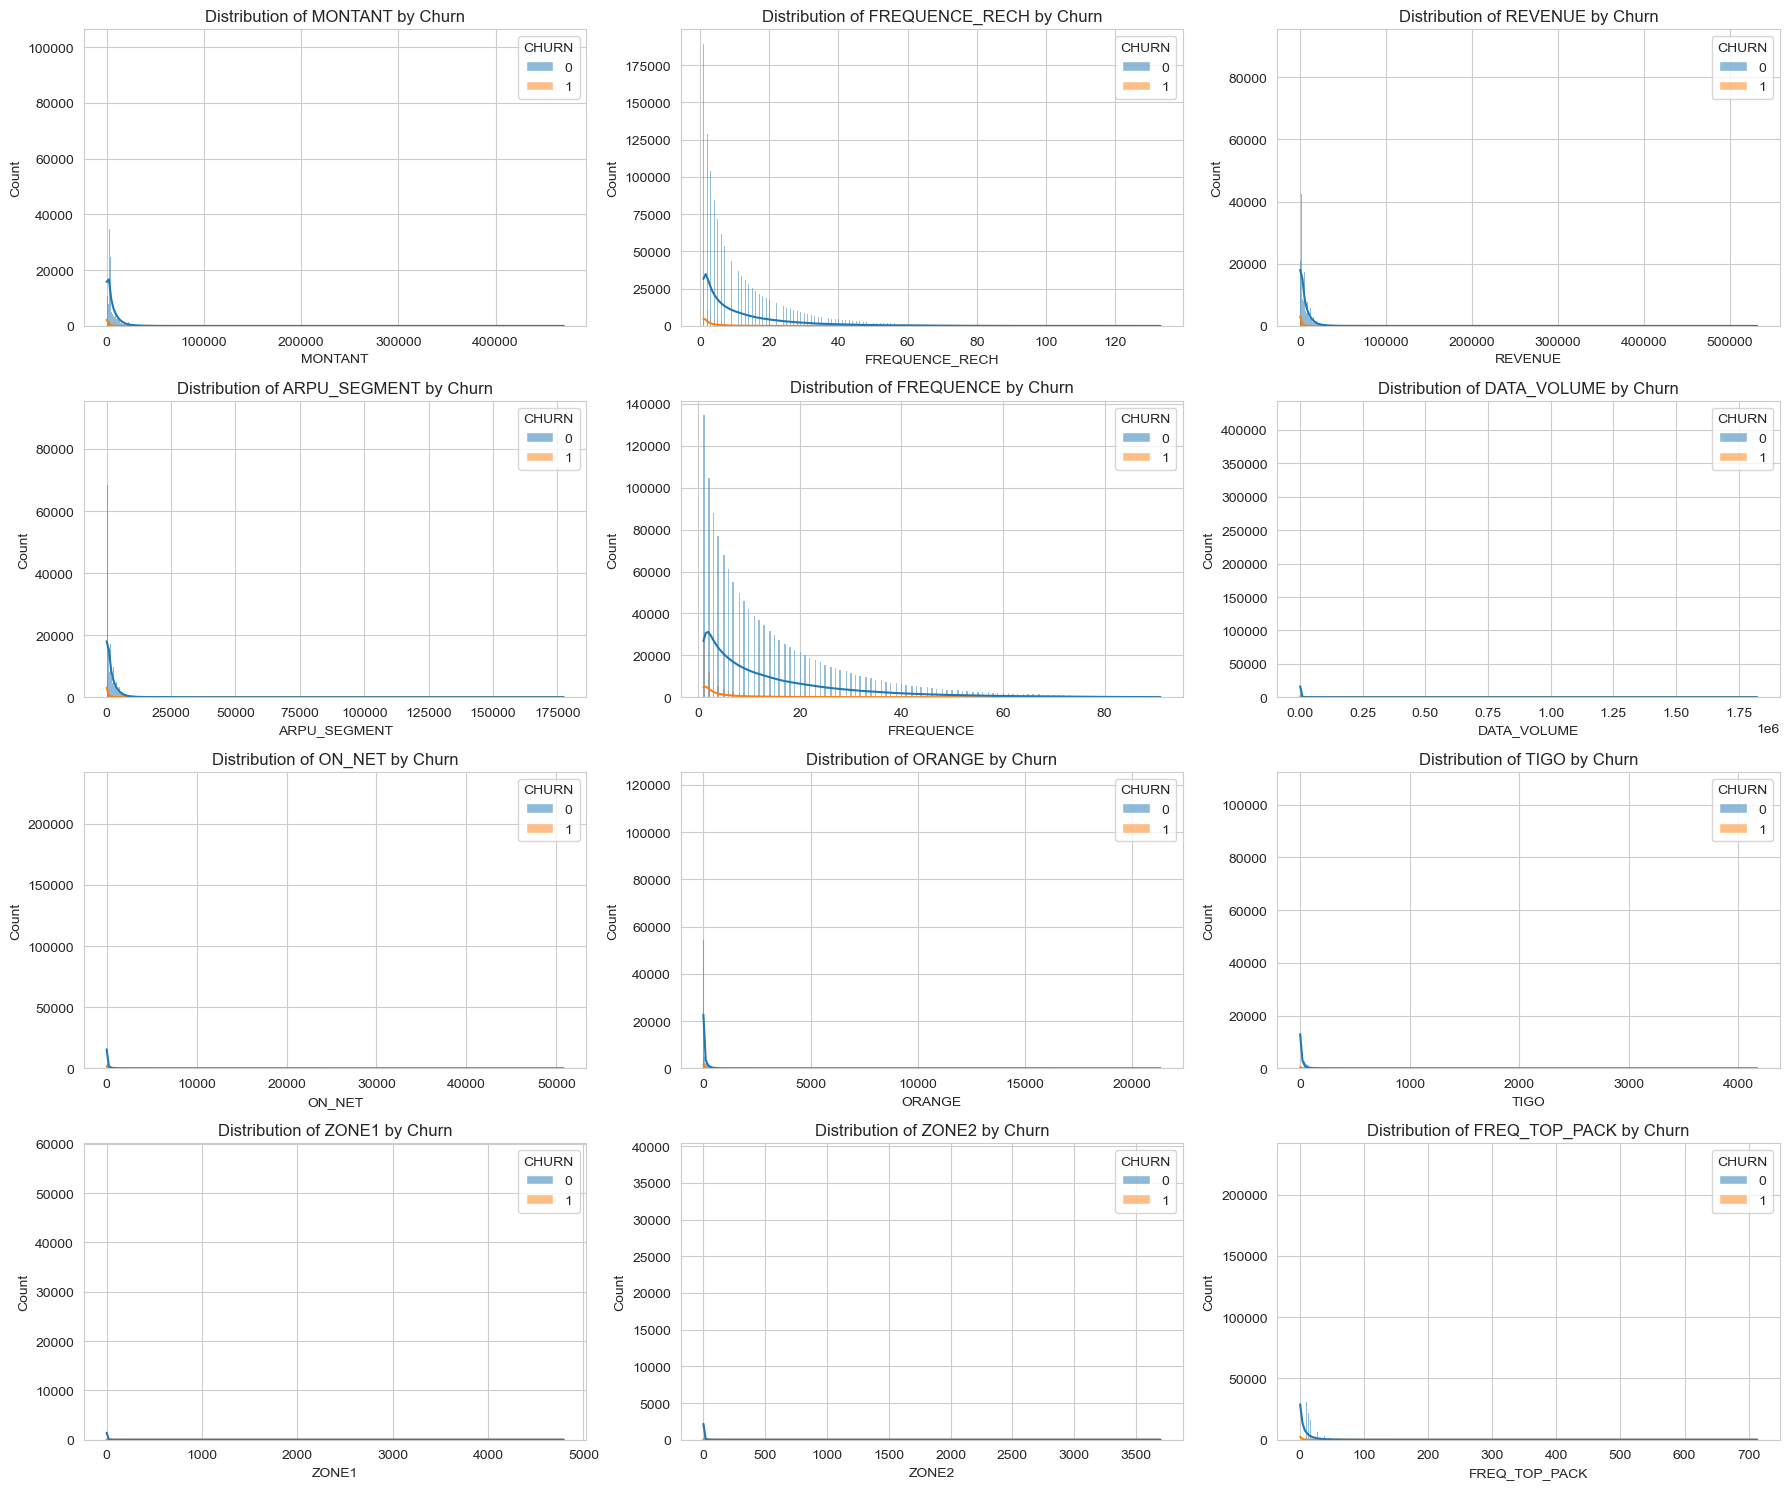

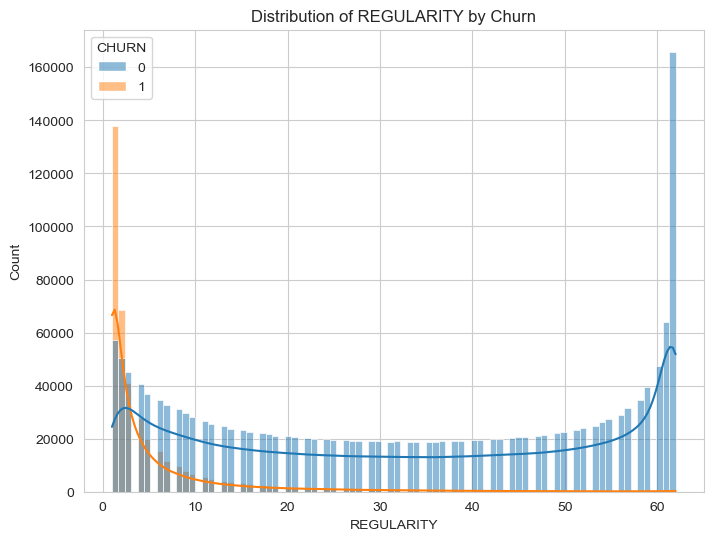

In [ ]:
#Create distribution plots for numerical features
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.ravel()

# for using grid
numerical_features_except_reg = [feat for feat in numerical_features if feat != 'REGULARITY']
for i, feature in enumerate(numerical_features_except_reg):
    if feature in df.columns:
        sns.histplot(data=df, x=feature, hue='CHURN', kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Churn')
        axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

# plot regularity separately
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='REGULARITY', hue='CHURN', kde=True)
plt.title('Distribution of REGULARITY by Churn')
plt.xlabel('REGULARITY')
plt.show()

#### Observations

##### 1. Heavy Skew in Most Features
- Features such as `MONTANT`, `FREQUENCE_RECH`, `REVENUE`, `ON_NET`, `ORANGE`, `TIGO`, `ZONE1`, `ZONE2`, and `FREQ_TOP_PACK` are **highly right-skewed**.  
- Most customers are concentrated at very low values, with a few extreme outliers stretching the scale.  
- Applying **log-transformations** could reduce the skew and help improve model learning.  

##### 2. Revenue & Spending Patterns
- **`REVENUE`, `MONTANT`, `ARPU_SEGMENT`:**
  - Both churners and non-churners cluster at the low end.  
  - Non-churners are more spread out at higher values.  
- Higher revenue/spending is linked to **better retention**.  

##### 3. Usage Frequency
- **`FREQUENCE` & `FREQUENCE_RECH`:**
  - Sharp drop after very low values.  
  - Churners dominate at **low frequency levels**.  
- Higher frequency users tend to have **lower churn risk**: active customers are more loyal.  

##### 4. Data & Network Usage
- **`DATA_VOLUME`:**
  - Extremely skewed — most customers use very little data.  
  - Non-churners extend into higher usage → **data-heavy users churn less**.  

- **`ON_NET`, `ORANGE`, `TIGO`, `ZONE1`, `ZONE2`:**
  - Concentrated near zero.  
  - Non-churners show slightly higher spread.  
- Suggests that **active engagement across networks/zones** is linked to retention.  

##### 5. Regularity
- **`REGULARITY`:**
  - Distribution is more evenly spread (0–60).  
  - Churners cluster at **low values**, while non-churners dominate at higher values.  
- Consistent usage strongly correlates with **lower churn**.  

##### 6. Popular Pack Frequency
- **`FREQ_TOP_PACK`:**
  - Heavily skewed, most customers near zero.  
  - Non-churners extend into higher frequency values.  
- Frequent pack purchases are associated with **higher retention**.  

##### Summary Insights
- Low activity across any metric (**spending, frequency, data, packs**) strongly correlates with **churn**.  
- High-value, regular, data-heavy, and frequent recharge customers show **lower churn risk**.  
- Features may need **log-scaling** or **normalization** before modeling to handle extreme skew.  


##### Correlation matrix

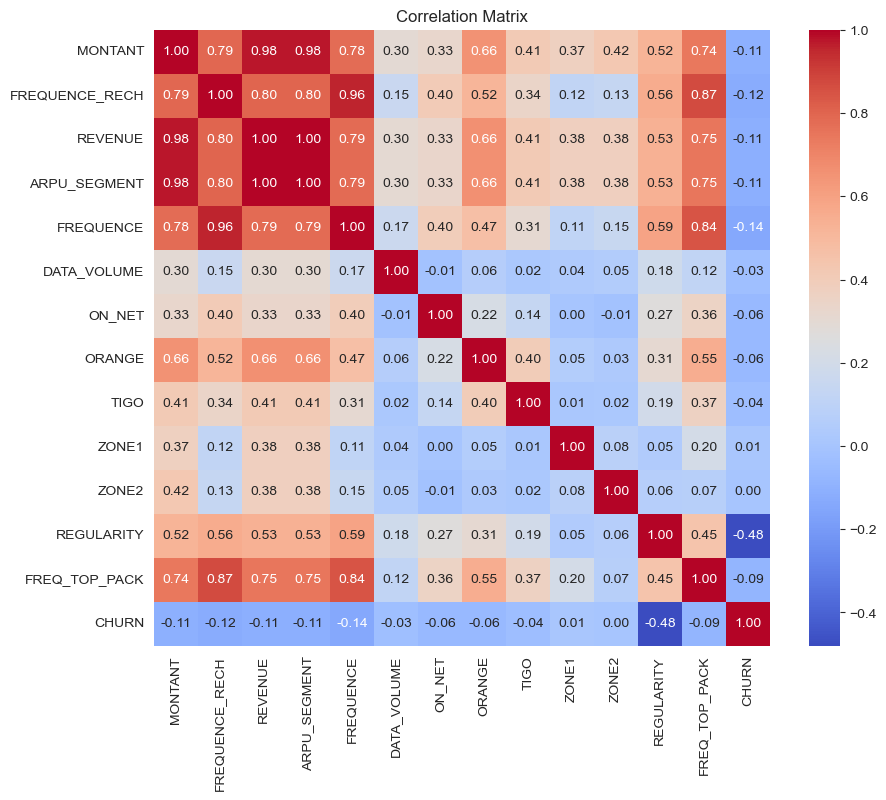

In [46]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features + ['CHURN']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### OBSERVATIONS

- Revenue-based features (`MONTANT`, `FREQUENCE_RECH`, `REVENUE`, `ARPU_SEGMENT`, `FREQUENCE`) are all very highly correlated (0.78–0.98), but all of these features have very low correlation with churn.
- The standout churn predictor among these features is `REGULARITY` as it has a substantially high negative correlation with `CHURN`, which makes sense as customers with more consistent usage are less likely to churn.

#### Categorical Features Analysis

In [25]:
categorical_features

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']

##### Number of categories

In [26]:
for feature in categorical_features:
    num_categories = df[feature].nunique()
    print(f"{feature}: {num_categories} categories")

user_id: 2154048 categories
REGION: 14 categories
TENURE: 8 categories
MRG: 1 categories
TOP_PACK: 140 categories


- We drop `user_id` for this particular analysis, as it has a unique value for each data point and does not have any notable feature.
- We also use the 20 most popular `TOP_PACK` values as part of this analysis.

In [27]:
categorical_features.remove('user_id')  # Remove unique identifier
top_packs = df['TOP_PACK'].value_counts().nlargest(20).index.tolist()

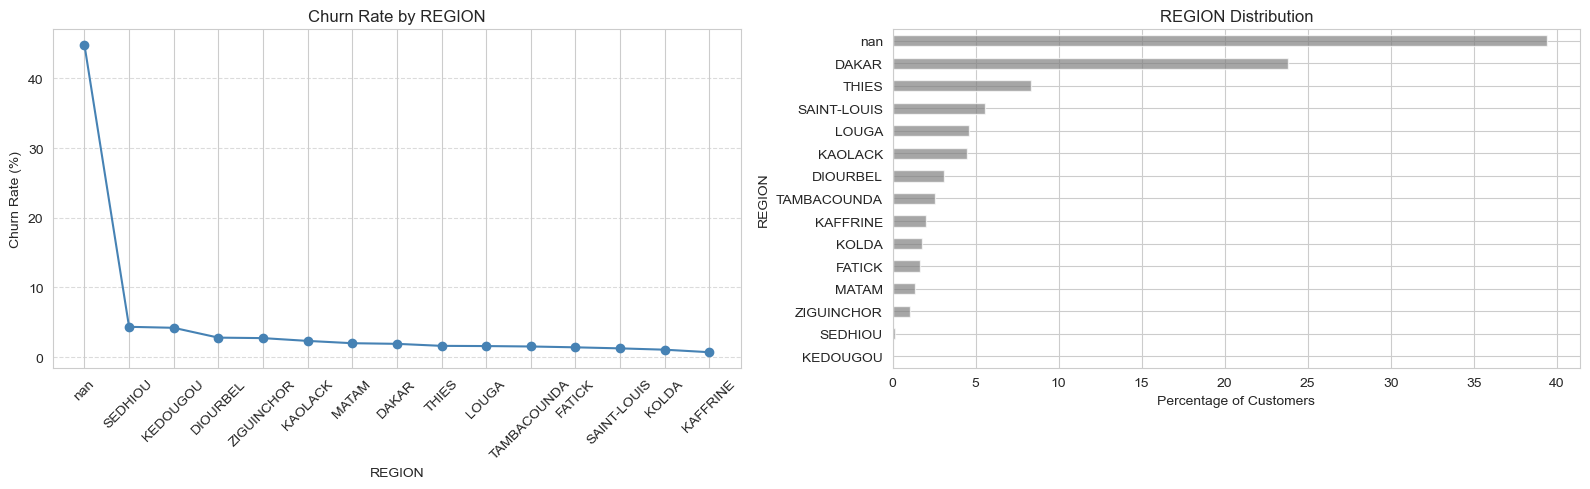


Summary for REGION:
              Count  Share (%)  Churn Rate (%)
REGION                                        
NaN          849299      39.43           44.80
SEDHIOU        3119       0.14            4.36
KEDOUGOU       1020       0.05            4.22
DIOURBEL      66911       3.11            2.81
ZIGUINCHOR    21945       1.02            2.74
KAOLACK       96986       4.50            2.34
MATAM         29083       1.35            2.01
DAKAR        513271      23.83            1.92
THIES        180052       8.36            1.63
LOUGA         99053       4.60            1.60
TAMBACOUNDA   55074       2.56            1.54
FATICK        35643       1.65            1.42
SAINT-LOUIS  119886       5.57            1.27
KOLDA         38743       1.80            1.08
KAFFRINE      43963       2.04            0.72


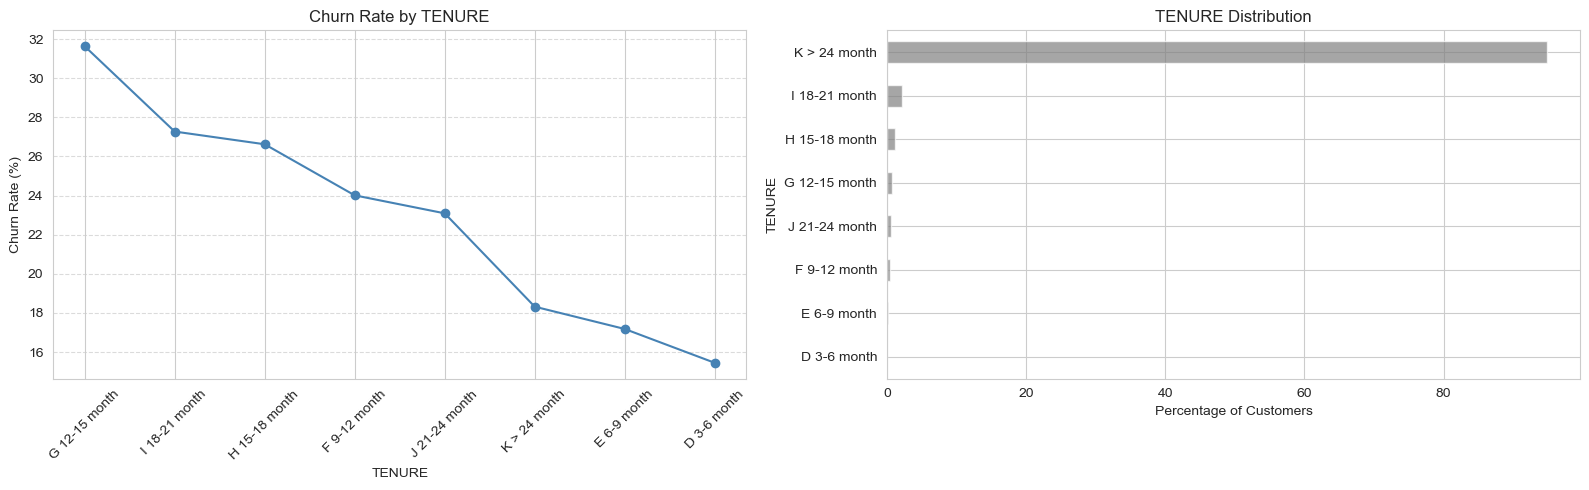


Summary for TENURE:
                 Count  Share (%)  Churn Rate (%)
TENURE                                           
G 12-15 month    14901       0.69           31.63
I 18-21 month    45278       2.10           27.27
H 15-18 month    26006       1.21           26.62
F 9-12 month      9328       0.43           24.01
J 21-24 month    12725       0.59           23.09
K > 24 month   2043201      94.85           18.32
E 6-9 month       1839       0.09           17.18
D 3-6 month        770       0.04           15.45


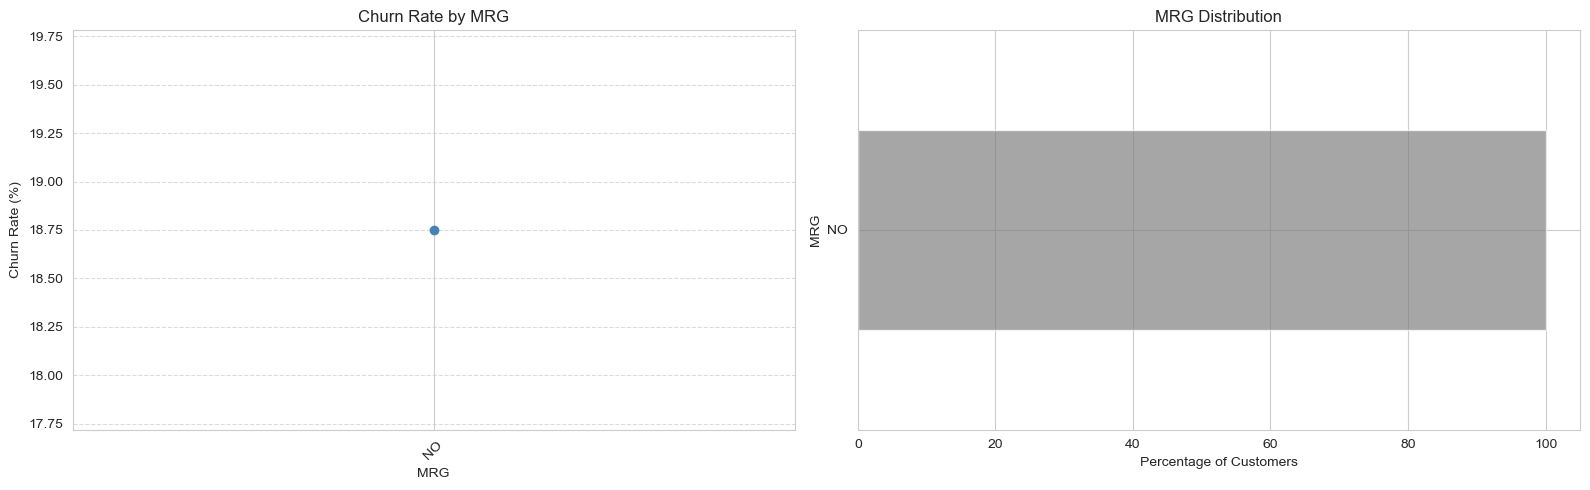


Summary for MRG:
       Count  Share (%)  Churn Rate (%)
MRG                                    
NO   2154048      100.0           18.75


In [34]:
for feature in ['REGION', 'TENURE', 'MRG']:
    if feature in df.columns:
        # Compute churn rates (include NaN as category)
        churn_rates = (
            df.groupby(feature, dropna=False)['CHURN']
              .mean() * 100
        )

        # Compute category distribution
        category_counts = df[feature].value_counts(dropna=False)
        category_percent = (category_counts / len(df)) * 100

        # Combine into one DataFrame
        summary = pd.DataFrame({
            "Count": category_counts,
            "Share (%)": category_percent.round(2),
            "Churn Rate (%)": churn_rates.round(2)
        }).sort_values("Churn Rate (%)", ascending=False)

        # ---- Plotting ----
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Left: Churn rate plot
        axes[0].plot(summary.index.astype(str), summary["Churn Rate (%)"], 
                     marker='o', linestyle='-', color='steelblue')
        axes[0].set_title(f'Churn Rate by {feature}')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel('Churn Rate (%)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)

        # Right: Category distribution
        summary["Share (%)"].sort_values().plot(
            kind='barh', ax=axes[1], color='gray', alpha=0.7
        )
        axes[1].set_title(f'{feature} Distribution')
        axes[1].set_xlabel('Percentage of Customers')
        axes[1].set_ylabel(feature)

        plt.tight_layout()
        plt.show()

        # ---- Print summary ----
        print(f"\nSummary for {feature}:")
        print(summary.to_string())



In [28]:
top_packs

['All-net 500F=2000F;5d',
 'On net 200F=Unlimited _call24H',
 'Data:490F=1GB,7d',
 'Data: 100 F=40MB,24H',
 'Mixt 250F=Unlimited_call24H',
 'MIXT:500F= 2500F on net _2500F off net;2d',
 'Data:1000F=2GB,30d',
 'All-net 500F =2000F_AllNet_Unlimited',
 'Jokko_Daily',
 'Data: 200 F=100MB,24H',
 'IVR Echat_Daily_50F',
 'On-net 500=4000,10d',
 'On-net 500F_FNF;3d',
 'Data:200F=Unlimited,24H',
 'MIXT: 200mnoff net _unl on net _5Go;30d',
 'On-net 1000F=10MilF;10d',
 'VAS(IVR_Radio_Daily)',
 'Data:1000F=5GB,7d',
 'Twter_U2opia_Daily',
 'All-net 600F= 3000F ;5d']

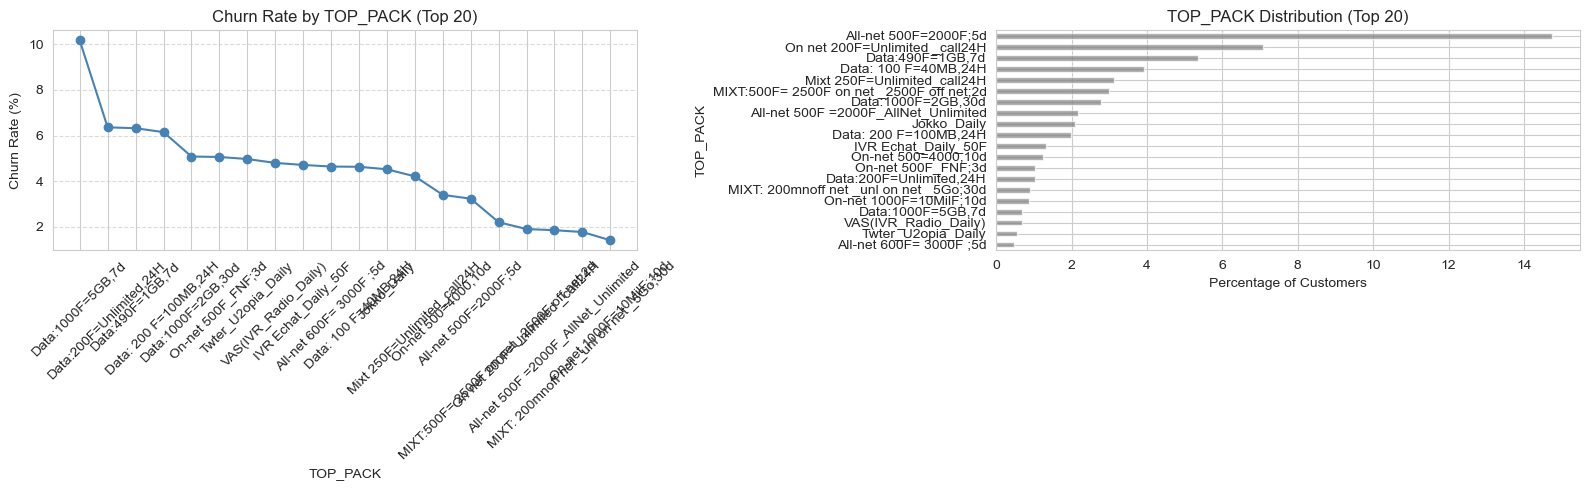


Summary for TOP_PACK (Top 20):
                                            Count  Share (%)  Churn Rate (%)
TOP_PACK                                                                    
Data:1000F=5GB,7d                           14629       0.68           10.17
Data:200F=Unlimited,24H                     22043       1.02            6.36
Data:490F=1GB,7d                           115180       5.35            6.32
Data: 200 F=100MB,24H                       42841       1.99            6.15
Data:1000F=2GB,30d                          59770       2.77            5.08
On-net 500F_FNF;3d                          22332       1.04            5.06
Twter_U2opia_Daily                          12060       0.56            4.97
VAS(IVR_Radio_Daily)                        14686       0.68            4.80
IVR Echat_Daily_50F                         28658       1.33            4.71
All-net 600F= 3000F ;5d                     10395       0.48            4.64
Data: 100 F=40MB,24H                        

In [35]:
# Top 20 packs by frequency
top_packs = df['TOP_PACK'].value_counts().head(20).index

# Compute churn rates and category distribution
top_pack_churn = (
    df[df['TOP_PACK'].isin(top_packs)]
      .groupby('TOP_PACK')['CHURN']
      .mean() * 100
)

top_pack_counts = df['TOP_PACK'].value_counts().loc[top_packs]
top_pack_percent = (top_pack_counts / len(df)) * 100

# Combine into one summary DataFrame
top_pack_summary = pd.DataFrame({
    "Count": top_pack_counts,
    "Share (%)": top_pack_percent.round(2),
    "Churn Rate (%)": top_pack_churn.round(2)
}).sort_values("Churn Rate (%)", ascending=False)

# ---- Plotting ----
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Left: churn rate plot
axes[0].plot(top_pack_summary.index.astype(str), 
             top_pack_summary["Churn Rate (%)"], 
             marker='o', linestyle='-', color='steelblue')
axes[0].set_title("Churn Rate by TOP_PACK (Top 20)")
axes[0].set_xlabel("TOP_PACK")
axes[0].set_ylabel("Churn Rate (%)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: category distribution
top_pack_summary["Share (%)"].sort_values().plot(
    kind="barh", ax=axes[1], color="gray", alpha=0.7
)
axes[1].set_title("TOP_PACK Distribution (Top 20)")
axes[1].set_xlabel("Percentage of Customers")
axes[1].set_ylabel("TOP_PACK")

plt.tight_layout()
plt.show()

# ---- Print summary ----
print("\nSummary for TOP_PACK (Top 20):")
print(top_pack_summary.to_string())


#### Observations

##### 1. Region (REGION)

- **NaN (39.4% of customers, churn = 44.8%)**  
  - Extremely high churn compared to the baseline.  
  - It represents almost **40% of the dataset**, making it a high-frequency, high-risk group.

- **High-share, low-churn regions:**  
  - **DAKAR (23.8%, churn 1.92%)**  
  - **THIES (8.4%, churn 1.63%)**  
  - **SAINT-LOUIS (5.6%, churn 1.27%)**  
  - Together these account for ~38% of the base but show very low churn.

- **Smaller high-churn regions:**  
  - **SEDHIOU (0.14%, churn 4.36%)**  
  - **KEDOUGOU (0.05%, churn 4.22%)**  
  - They have relatively higher churn compared to other regions, but impact is limited due to small population share.  

**Takeaway:** Region is highly predictive. Missing values and smaller rural regions show higher churn, while large urban centers are more stable.

##### 2. Tenure (TENURE)

- **Dominant group:**  
  - *K > 24 months (94.9% share, churn 18.3%)*  
  - Their churn rate is almost equal to the baseline, meaning the overall churn is driven by this group.  

- **Small but very risky groups:**  
  - *G 12–15 months (0.7%, churn 31.6%)*  
  - *I 18–21 months (2.1%, churn 27.3%)*  
  - *H 15–18 months (1.2%, churn 26.6%)*  
  - Indicates a **vulnerable period around 12–21 months**, where churn risk peaks.  

- **Other groups:**  
  - *F 9–12 months (0.4%, churn 24.0%)*  
  - *J 21–24 months (0.6%, churn 23.1%)*  
  - *E/D groups (<9 months, <1% share each)* show relatively high churn but contribute little to overall churn because of their small size.  

**Takeaway:** Tenure is one of the strongest churn predictors, with risk concentrated in the 12–21 month window.

##### 3. Marketing Group (MRG)

- Only one observed category: *NO (100% share, churn 18.75%)*.  
- Provides no segmentation value on its own.

##### 4. Service Packages (TOP_PACK – Top 20)

- **Large-share, low-churn packs:**  
  - *All-net 500F=2000F;5d (14.8% share, churn 3.23%)*  
  - *On net 200F=Unlimited call24H (7.1% share, churn 1.90%)*  
  - *Data:490F=1GB,7d (5.4% share, churn 6.32%)*  
  - These plans dominate usage and act as stabilizing factors in retention.  

- **Moderate-share, moderate churn packs:**  
  - *Mixt 250F=Unlimited_call24H (3.1%, churn 4.21%)*  
  - *Data:1000F=2GB,30d (2.8%, churn 5.08%)*  

- **Small-share, high-churn packs:**  
  - *Data:1000F=5GB,7d (0.68%, churn 10.17%)*  
  - *Data:200F=Unlimited,24H (1.0%, churn 6.36%)*  
  - Churn is relatively high, but these categories are too small to heavily influence overall churn.  

**Takeaway:** The most popular packages are associated with significantly lower churn, while smaller/niche packs show higher churn risk.

##### Overall Observations

- **Region** and **Tenure** are the strongest churn predictors.  
  - Missing region data is both large in share and high risk.  
  - Churn spikes for customers in the **12–21 month window**.  
- **TOP_PACK** shows strong segmentation: popular packages help retain customers, while niche packs correlate with higher churn.  
- **MRG** provides no useful segmentation on its own.  
- **Baseline churn is 18.75%**, but certain categories (e.g., *12–21 month tenure*, *NaN region*) are **far above**, while others (e.g., *Dakar, long-tenure, popular packs*) are **well below**. 

#### **NOTE**: Due to memory constraints, the actual runs were done on SLURM. For convenience, we use a subset of data to run the experiments within this notebook.

#### DATA PREPROCESSING

In [15]:
# Due to memory contraints using a subset of data for modeling, we still provide actual logs from slurm jobs

df, _ = train_test_split(
    df,
    train_size=5000,                          
    stratify=df["CHURN"],             
    random_state=RANDOM_SEED
)

##### **Drop Columns**

1. **user_id**  
   - A unique identifier assigned to each customer.  
   - Since every record has a different value, it provides no predictive power for churn. 


In [16]:
df.drop('user_id', axis=1, inplace=True) # Just a unique Identifier

2. **MRG**  
   - This column contains only one unique value (`NO`).  
   - With no variability across customers, it cannot contribute to explaining differences in churn behavior. 

In [17]:
df.drop('MRG', axis=1, inplace=True) # All data points have the same value

##### **Feature Encoding**

- `TENURE` : we convert this column from a category to a numerical variable by replacing each tenure category with its corresponding lower bound. 

For example: 'G 12-15 month' is converted to 12.

In [18]:
#mapping_dict
mapping_dict = {'K > 24 month': 24, 'I 18-21 month': 18, 'H 15-18 month': 15, 'G 12-15 month': 12, 'J 21-24 month': 21, 'F 9-12 month': 9, 'E 6-9 month': 6, 'D 3-6 month': 3}


df['TENURE'] = df["TENURE"].apply(lambda x: mapping_dict[x])

#### Handpicked Derived Features (Based on Intuition and Domain Knowledge)

##### Selected features in `num_features_high`

Using **XGBoost** on the numerical features only, we shortlisted the **top 6 features** based on feature importance scores:

- `REGULARITY`  
- `REVENUE`  
- `ARPU_SEGMENT`  
- `FREQUENCE_RECH`  
- `MONTANT`  
- `ON_NET`  


In [19]:
# save the original columns before adding new features
original_columns = df.columns.tolist()
num_features_high = ['REGULARITY', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE_RECH', 'MONTANT', 'ON_NET']
num_features_all = df.select_dtypes(include=["number"]).columns.tolist()
num_features_all.remove("CHURN")

##### 1) Data Completeness
- **`NULL_VALUE_COUNT`**  
  - **Definition:** Total number of missing values per customer (row-wise null count).  
  - **Why:** High missingness often correlates with low engagement or data quality issues. Another reason for this feature is due to `REGION` having a very high churn rate corresponding to `NaN`.

In [20]:
#null counts
df["NULL_COUNTS"] = df.isna().sum(axis=1)

##### 2) Customer Value & Spending
- **`REVENUE_PER_FREQUENCE`**  
  - **Definition:** `REVENUE / FREQUENCE`  
  - **Why:** Revenue normalized by usage frequency helps identify high-value but low-usage vs. high-usage low-value customers.  

- **`SPENDING_CONSISTENCY`**  
  - **Definition:** `MONTANT / REVENUE`  
  - **Why:** Relates recharge amounts to actual revenue: outliers may suggest irregular spending or bonus credits.  

- **`HIGH_VALUE_CUSTOMER`**  
  - **Definition:** Binary flag → 1 if `ARPU_SEGMENT > median(ARPU_SEGMENT)` else 0.  
  - **Why:** Simple segmentation to distinguish premium vs. average customers.  

- **`SPENDING_PATTERN`**  
  - **Definition:** `MONTANT / FREQUENCE_RECH`  
  - **Why:** Average top-up per recharge event which helps reveal small vs. large top-up behavior.  

In [21]:
#revenue per frequency
df['REVENUE_PER_FREQUENCE'] = df['REVENUE'] / (df['FREQUENCE'] + 1)

In [22]:
#spending consistency
df['SPENDING_CONSISTENCY'] = df['MONTANT'] / (df['REVENUE'] + 1)

In [23]:
#high value customer
df['HIGH_VALUE_CUSTOMER'] = (df['ARPU_SEGMENT'] > df['ARPU_SEGMENT'].median()).astype(int)

In [24]:
#spending pattern
df['SPENDING_PATTERN'] = df['MONTANT'] / (df['FREQUENCE_RECH'] + 1)

##### 3) Usage & Engagement
- **`ENGAGEMENT_SCORE`**  
  - **Definition:** Weighted or simple sum of `FREQUENCE + FREQUENCE_RECH` (normalize if needed).  
  - **Why:** Quick proxy for user activeness across recharge + usage.  

- **`USAGE_DECLINE`**  
  - **Definition:** Flag = 1 if `FREQUENCE_RECH < FREQUENCE`, else 0.  
  - **Why:** Indicates recharge not keeping pace with usage (potential churn risk).  

- **`UNLIMITED_PACK`**  
  - **Definition:** Binary flag - 1 if `TOP_PACK` string contains `"unlimited"`, else 0.  
  - **Why:** Users with unlimited packs behave differently (may churn less / more loyal).  

- **`POPULAR_PACK`**  
  - **Definition:** Quartile bin of `value_counts(TOP_PACK)` (0 = least popular, 3 = most popular).  
  - **Why:** Customers on popular packages may have different churn risk vs. niche plans.  

In [25]:
# Engagement score
df['ENGAGEMENT_SCORE'] = (df['FREQUENCE_RECH'] + df['FREQUENCE']) / 2 

In [26]:
#usage decline
df['USAGE_DECLINE'] = (df['FREQUENCE_RECH'] < df['FREQUENCE']).astype(int)

In [27]:
# unlimited pack user
df['UNLIMITED_PACK'] = 0
df.loc[df['TOP_PACK'].str.contains("unlimited", case=False, na=False), 'UNLIMITED_PACK'] = 1

In [28]:
# popular pack
low = df['TOP_PACK'].value_counts().describe()["25%"]
mid = df['TOP_PACK'].value_counts().describe()["50%"]
high = df['TOP_PACK'].value_counts().describe()["75%"]

val_counts = df['TOP_PACK'].value_counts()

def pack_pop(pack):
    if pack is np.nan:
        return -1

    val = val_counts[pack]

    if val < low:
        return 1
    elif val < mid:
        return 2
    elif val < high:
        return 3
    else:
        return 4

df["PACK_POP"] = df['TOP_PACK'].apply(pack_pop)

#### Correlation Matrix with newly added features

In [29]:
new_features = [col for col in df.columns if col not in original_columns]
# compute correlations and display in descending order
corr_with_target = df[new_features + ['CHURN']].corr()['CHURN'].sort_values(ascending=False)
print("\nCorrelation of New Features with CHURN:")
print(corr_with_target)



Correlation of New Features with CHURN:
CHURN                    1.000000
NULL_COUNTS              0.537060
SPENDING_CONSISTENCY    -0.006008
SPENDING_PATTERN        -0.042419
REVENUE_PER_FREQUENCE   -0.055903
ENGAGEMENT_SCORE        -0.132155
UNLIMITED_PACK          -0.158838
HIGH_VALUE_CUSTOMER     -0.316889
USAGE_DECLINE           -0.358027
PACK_POP                -0.450179
Name: CHURN, dtype: float64


##### Observations

- `NULL_COUNTS` has a strong **positive correlation** with churn (**0.54**), indicating that customers with more missing data are more likely to churn.  
- `PACK_POP` has a strong **negative correlation** with churn (**-0.45**), suggesting that customers subscribed to popular packages are less likely to churn.  
- `USAGE_DECLINE` shows a moderate **negative correlation** (**-0.34**), meaning customers whose usage is dropping are more likely to churn.  
- `HIGH_VALUE_CUSTOMER` has a moderate **negative correlation** (**-0.30**), indicating that high-value customers are less likely to churn.  
- `UNLIMITED_PACK` has a weak **negative correlation** (**-0.16**), showing that unlimited plan users are slightly more stable.  
- `ENGAGEMENT_SCORE` has a weak **negative correlation** (**-0.11**), suggesting more engaged customers churn less, though the effect is minor.  
- `REVENUE_PER_FREQUENCE`, `SPENDING_PATTERN`, and `SPENDING_CONSISTENCY` show **little to no correlation** (between -0.05 and 0.01), implying that these features add minimal predictive value for churn.  


### Data after adding manual derived features

In [30]:
df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,CHURN,NULL_COUNTS,REVENUE_PER_FREQUENCE,SPENDING_CONSISTENCY,HIGH_VALUE_CUSTOMER,SPENDING_PATTERN,ENGAGEMENT_SCORE,USAGE_DECLINE,UNLIMITED_PACK,PACK_POP
852664,DAKAR,24,12600.0,47.0,12787.0,4262.0,58.0,18449.0,41.0,1.0,...,0,3,216.728814,0.985299,1,262.500000,52.5,1,1,4
921909,NaN,18,1000.0,1.0,1000.0,333.0,1.0,0.0,NaN,16.0,...,1,5,500.000000,0.999001,0,500.000000,1.0,0,0,2
2093107,LOUGA,24,3000.0,5.0,3000.0,1000.0,5.0,NaN,89.0,11.0,...,0,3,500.000000,0.999667,0,500.000000,5.0,0,1,4
2112467,DAKAR,24,14500.0,27.0,15000.0,5000.0,28.0,NaN,24.0,430.0,...,0,3,517.241379,0.966602,1,517.857143,27.5,1,0,4
1982040,TAMBACOUNDA,24,NaN,NaN,NaN,NaN,NaN,56.0,5.0,NaN,...,0,11,NaN,NaN,0,NaN,NaN,0,0,-1


#### Brute-force Feature Engineering

1. **Log Transformation of Numerical Features**  
   - Most numerical features are heavily right-skewed.  
   - We applied a log transform to each numerical feature to reduce skewness and help the model capture patterns more effectively.  

2. **Region-Wise Feature Means**  
   - Observations showed higher churn rates in certain regions (e.g., `NA`).  
   - To capture regional effects, we added the **region-wise mean values** of all numerical features as new features.  

3. **Feature Interactions ( + , − , × , ÷ )**  
   - Using the top high-importance features identified by XGBoost (`REGULARITY`, `REVENUE`, `ARPU_SEGMENT`, `FREQUENCE_RECH`, `MONTANT`, `ON_NET`).  
   - Created interaction features by combining them through addition, subtraction, multiplication, and division.  
   - Goal: capture **non-linear relationships** and potential synergies between key predictors.  

In [31]:
feature_list_all, feature_list_high = num_features_all, num_features_high 


n = len(feature_list_high)
epsilon = 1e-6

# Grouping by Region
region_groups = df[feature_list_all + ['REGION']].groupby("REGION").mean()
for feature in feature_list_all:
  feature_name = "REGION_MEAN_" + feature
  region_groups[feature_name] = region_groups[feature]
  region_groups.drop(feature, axis=1, inplace=True)

df = pd.merge(df, region_groups, on='REGION', how='left')


# log features
for feature in feature_list_all:
  feature_name = 'log(' + feature + ")"
  df[feature_name] = np.log(df[feature] + epsilon)

# Cross Features
for i in range(n-1):
  for j in range(i+1, n):
    feature_add = feature_list_high[i] + "+" + feature_list_high[j]
    feature_sub = feature_list_high[i] + "-" + feature_list_high[j]
    feature_mult = feature_list_high[i] + "*" + feature_list_high[j]
    feature_div = feature_list_high[i] + "/" + feature_list_high[j]

    df[feature_add] = df[feature_list_high[i]] + df[feature_list_high[j]]
    df[feature_sub] = df[feature_list_high[i]] - df[feature_list_high[j]]
    df[feature_mult] = df[feature_list_high[i]] * df[feature_list_high[j]]
    df[feature_div] = df[feature_list_high[i]] / (df[feature_list_high[j]] + epsilon)

drop = ['REGION', 'TOP_PACK']
df = df.drop(drop, axis=1)




#### Data after adding brute-force derived features

In [32]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,FREQUENCE_RECH*MONTANT,FREQUENCE_RECH/MONTANT,FREQUENCE_RECH+ON_NET,FREQUENCE_RECH-ON_NET,FREQUENCE_RECH*ON_NET,FREQUENCE_RECH/ON_NET,MONTANT+ON_NET,MONTANT-ON_NET,MONTANT*ON_NET,MONTANT/ON_NET
0,24,12600.0,47.0,12787.0,4262.0,58.0,18449.0,41.0,1.0,NaN,...,592200.0,0.003730,88.0,6.0,1927.0,1.146341,12641.0,12559.0,516600.0,307.317066
1,18,1000.0,1.0,1000.0,333.0,1.0,0.0,NaN,16.0,NaN,...,1000.0,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,3000.0,5.0,3000.0,1000.0,5.0,NaN,89.0,11.0,29.0,...,15000.0,0.001667,94.0,-84.0,445.0,0.056180,3089.0,2911.0,267000.0,33.707865
3,24,14500.0,27.0,15000.0,5000.0,28.0,NaN,24.0,430.0,19.0,...,391500.0,0.001862,51.0,3.0,648.0,1.125000,14524.0,14476.0,348000.0,604.166641
4,24,NaN,NaN,NaN,NaN,NaN,56.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Separate features and target, and split into train and validation sets

In [33]:
X = df.drop('CHURN', axis=1)
y = df['CHURN']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

#### Modeling  

##### Baseline Models
1. **Logistic Regression**  
2. **Random Forest Classifier**  
3. **XGBoost Classifier**  

Each model underwent hyperparameter tuning, followed by training on the full training set and evaluation on the test set.  

##### Search Strategy
- **Search Method:** HalvingGridSearchCV (successive halving for efficiency)  
- **Cross-Validation:** Stratified 3-fold  
- **Scoring Metric:** ROC-AUC (accounts for class imbalance)  
- **Parallelization:** 6 jobs  


##### Shared Preprocessor (Common for All Models)

- Imputer → *MedianImputer*
- Scaler → *StandardScaler*

This is done after cross-validation split, and ensures consistent preprocessing before the data is fed into the models


In [35]:
shared_preprocessor = ColumnTransformer([
    ('num', 
    Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler(with_mean=False))  # keep sparse
    ]),
    X_train.columns.tolist()
    ),
])


#### Model 1: Logistic Regression - Grid Search

In [42]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', shared_preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=20)),
    ('classifier', LogisticRegression(random_state=RANDOM_SEED, max_iter=1000))
])

# Parameter grid for Logistic Regression
lr_param_grid = {
    'feature_selector__k': [25, 30, 40],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# GridSearchCV for Logistic Regression:cite[1]
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=StratifiedKFold(3), 
                      scoring='roc_auc', n_jobs=1, verbose=1)
lr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__C': [0.1, 1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear', 'saga'], 'feature_selector__k': [25, 30, ...]}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [43]:
print("Best Parameters:", lr_grid.best_params_)
print("Best ROC AUC:", lr_grid.best_score_)

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'feature_selector__k': 40}
Best ROC AUC: 0.9171078651506738


##### Logistic Regression SLURM Logs
```text
Fitting 3 folds for each of 60 candidates, totalling 180 fits
RF-- STARTED
XGBOOST-- STARTED

==================================================
 Logistic Regression
==================================================
Best CV Score: 0.9291
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'feature_selector__k': 60}
Test AUC: 0.9293
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.68      0.66      0.67     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.80      0.80    430810
weighted avg       0.88      0.88      0.88    430810


============================================================
 MODEL COMPARISON SUMMARY
============================================================
Logistic Regression       | CV AUC: 0.9291 | Test AUC: 0.9293
Finished training at Fri Oct  3 09:18:24 +04 2025
```

#### Model 2: Random Forest

In [ ]:
# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', shared_preprocessor),
    ('feature_selector', RFE(estimator=RandomForestClassifier(random_state=RANDOM_SEED), n_features_to_select=20)),
    ('classifier', RandomForestClassifier(random_state=RANDOM_SEED, class_weight='balanced'))
])

# Parameter grid for Random Forest:cite[3]:cite[6]
rf_param_grid = {
    'feature_selector__n_features_to_select': [25, 30],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=StratifiedKFold(3), 
                      scoring='roc_auc', n_jobs=1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [10, 20], 'classifier__min_samples_leaf': [1, 2], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [50, 100]}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [40]:
print("Best Parameters:", rf_grid.best_params_)
print("Best ROC AUC:", rf_grid.best_score_)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best ROC AUC: 0.9272392226276832


##### Random Forest SLURM Logs

##### Please refer to log files for the complete logs

```text

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 191470
max_resources_: 1723238
aggressive_elimination: False
factor: 3
----------


==================================================
 Random Forest 
==================================================
Best CV Score: 0.9302
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Test AUC: 0.9304
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89    350013
           1       0.54      0.91      0.68     80797

    accuracy                           0.84    430810
   macro avg       0.76      0.87      0.78    430810
weighted avg       0.89      0.84      0.85    430810


============================================================
 MODEL COMPARISON SUMMARY 
============================================================
Random Forest             | CV AUC: 0.9302 | Test AUC: 0.9304
[CV 1/3; 3/3] START classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100
[CV 1/3; 3/3] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=(train=0.932, test=0.930) total time= 1.9min
[CV 3/3; 3/3] START classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100
[CV 3/3; 3/3] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=(train=0.932, test=0.931) total time= 1.8min
[CV 2/3; 3/3] START classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100
[CV 2/3; 3/3] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=(train=0.932, test=0.930) total time= 1.9min
`

#### Model 3: XGBOOST

In [46]:
# Random Forest
xgb_pipeline = Pipeline([
                ('preprocessor', shared_preprocessor),
                ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=30)),
                ('classifier', XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss', device="cuda:0"))]
            )


# Parameter grid for XGB
xgb_param_grid = {
                    'feature_selector__k': [25, 30, 40],
                    'classifier__n_estimators': [100, 200],
                    'classifier__max_depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1, 0.2],
                    'classifier__subsample': [0.8, 1.0]
                }

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=StratifiedKFold(3), 
                      scoring='roc_auc', n_jobs=1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__learning_rate': [0.01, 0.1, ...], 'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [100, 200], 'classifier__subsample': [0.8, 1.0], ...}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


### XGBOOST SLURM LOGS
```text
----------
iter: 1
n_candidates: 36
n_resources: 63822
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 2
n_candidates: 12
n_resources: 191466
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 3
n_candidates: 4
n_resources: 574398
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 1723194
Fitting 3 folds for each of 2 candidates, totalling 6 fits

==================================================
 XGB 
==================================================
Best CV Score: 0.9303
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0, 'feature_selector__k': 30}
Test AUC: 0.9306
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.69      0.65      0.67     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.79      0.80    430810
weighted avg       0.88      0.88      0.88    430810

Finished training at Wed Oct  1 04:42:10 PM +04 2025


In [ ]:
def evaluate_model(grid_search, model_name, X_test, y_test):
    """Evaluate and display model performance"""
    print(f"\n{'='*50}")
    print(f" {model_name} ")
    print(f"{'='*50}")
    
    print(f"Best CV Score: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Test set performance
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Test AUC: {test_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    
    return {
        'model': model_name,
        'best_cv_score': grid_search.best_score_,
        'test_auc': test_auc,
        'best_params': grid_search.best_params_
    }


results = []
results.append(evaluate_model(lr_grid, "Logistic Regression", X_val, y_val))
results.append(evaluate_model(rf_grid, "Random Forest", X_val, y_val))
results.append(evaluate_model(xgb_grid, "XGBoost", X_val, y_val))

# Compare results
print(f"\n{'='*60}")
print(" MODEL COMPARISON SUMMARY ")
print(f"{'='*60}")


for result in results:
    print(f"{result['model']:25} | CV AUC: {result['best_cv_score']:.4f} | Test AUC: {result['test_auc']:.4f}")

# RESULTS

## XGBoost Classification Report

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Class 0     | 0.92      | 0.93   | 0.93     | 350,013 |
| Class 1     | 0.69      | 0.65   | 0.67     | 80,797  |
| **Accuracy**|           |        | **0.88** | 430,810 |
| **Macro Avg**   | 0.80  | 0.79   | 0.80     | 430,810 |
| **Weighted Avg**| 0.88  | 0.88   | 0.88     | 430,810 |


## Random Forest Classification Report

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| 0           | 0.98      | 0.82   | 0.89     | 350,013 |
| 1           | 0.54      | 0.91   | 0.68     | 80,797  |
| **Accuracy**|           |        | **0.84** | 430,810 |
| Macro Avg   | 0.76      | 0.87   | 0.78     | 430,810 |
| Weighted Avg| 0.89      | 0.84   | 0.85     | 430,810 |


## Logistic regression Classification Report

| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 0.93   | 0.93     | 350,013 |
| 1            | 0.68      | 0.66   | 0.67     | 80,797  |
| **Accuracy** |           |        | **0.88** | 430,810 |
| Macro Avg    | 0.80      | 0.80   | 0.80     | 430,810 |
| Weighted Avg | 0.88      | 0.88   | 0.88     | 430,810 |


In [7]:


def plot_cf_heatmap(CM, model_name):
    labels = ["Class 0", "Class 1"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(CM, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()




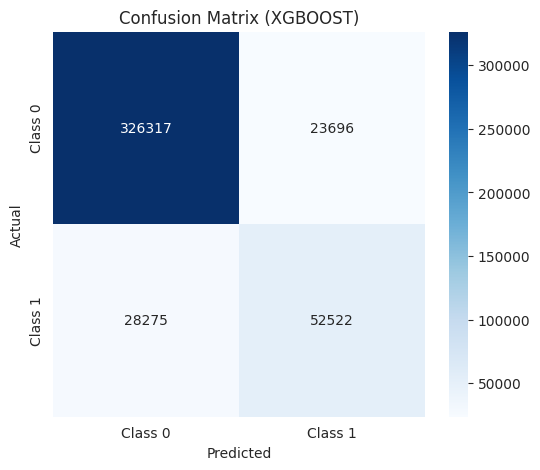

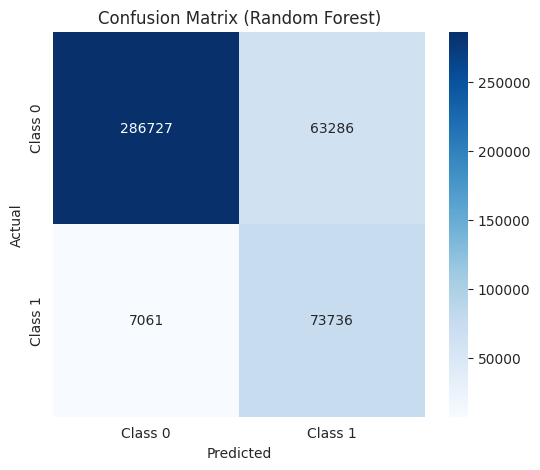

In [11]:
# Values from the training logs  - logs/xgb.out
TP = 52522
TN = 326317
FP = 23696
FN = 28275

XGB_CM = [[TN, FP], [FN, TP]]
RF_CM = [[286727, 63286],[7061, 73736]]
plot_cf_heatmap(XGB_CM, "XGBOOST")
plot_cf_heatmap(RF_CM, "Random Forest")

## Area Under the Curve (AUC) Score
#### CV ROC-AUC Score: 0.9303
#### Test ROC-AUC Score: 0.9306



## Class based analysis

Class 0 (Non-Churn): High precision (0.92) and recall (0.93) indicate the model is very reliable at identifying customers who are unlikely to churn.

Class 1 (Churn): Precision (0.69) and recall (0.65) are moderate, showing that while the model does not capture every churner, it still identifies a significant portion of them. This is important because even moderate recall in churn prediction can translate into meaningful savings when proactive retention strategies are applied.

## Significance of Precision and Recall in Business Terms

In the context of customer churn prediction, the trade-off between precision and recall has direct budget implications:

High Recall for Churn (Class 1):

* Recall = 0.65 means the model successfully identifies 65% of actual churners.

* This is important because missing a churner (False Negative) means losing a customer without taking preventive action — which translates to lost revenue.

* A higher recall ensures more at-risk customers are flagged, but it may increase the intervention cost.

High Precision for Churn (Class 1):

* Precision = 0.69 means that 69% of customers flagged as churn are truly churners.

* This matters because false positives (customers wrongly flagged as churners) could lead to unnecessary retention spending (discounts, offers, or outreach).

* A higher precision reduces wasted budget on customers who were not going to churn anyway.

## Budget Implications

* If the budget is limited, the business may prioritize higher precision, ensuring that money spent on retention efforts is targeted and efficient.

* If the budget is flexible and the business prioritizes customer retention over short-term costs, then higher recall is more valuable, as it reduces revenue loss from churn.

The current balance (Precision = 0.69, Recall = 0.65) suggests:

* A good trade-off between cost-efficiency and customer coverage.

* Enough predictive power to justify its use in business strategy, especially when even partial churn reduction yields significant financial benefit.

## Conclusion
In summary, while Class 1 performance is not perfect, it is still strong enough to deliver actionable insights. The model enables the company to proactively save a majority of at-risk customers, making it a valuable decision-support tool within the available budget.